In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [5]:
df = pd.read_csv('/mcdonalds.csv')

In [6]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
df.shape

(1453, 15)

In [8]:
df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [10]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [11]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [12]:
df.nunique()

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

In [13]:
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [14]:
df.loc[df['Like'] == 'I hate it!-5', 'Like'] = -5
df.loc[df['Like'] == 'I love it!+5', 'Like'] = +5

In [15]:
df['Like'].value_counts()

+3    229
+2    187
0     169
+4    160
+1    152
-5    152
5     143
-3     73
-4     71
-2     59
-1     58
Name: Like, dtype: int64

array([[<Axes: title={'center': 'Age'}, xlabel='[Like]'>, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

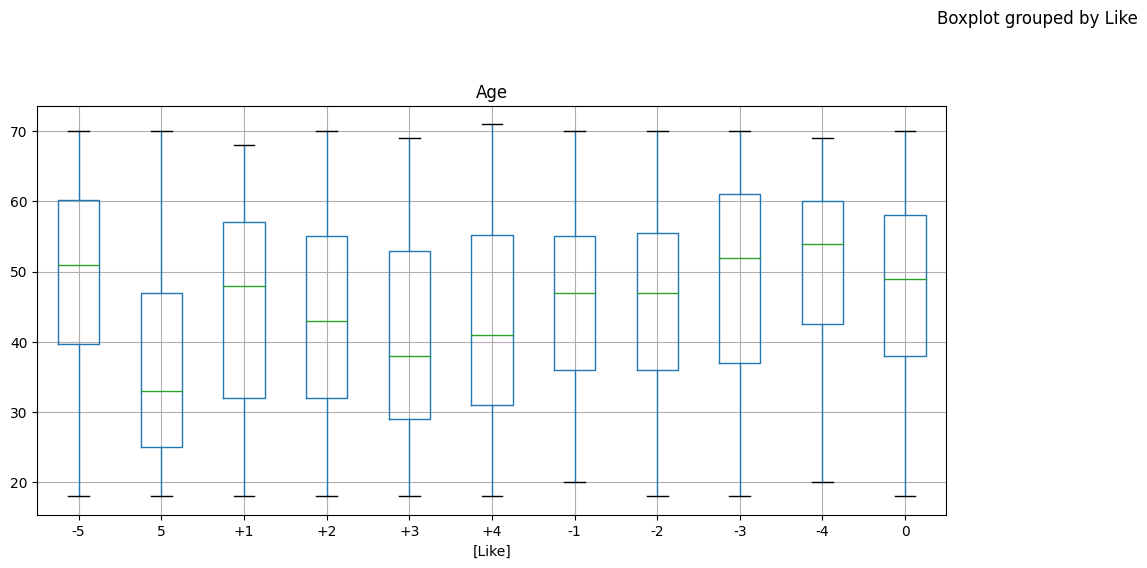

In [16]:
df.boxplot(by="Like", layout=(2, 2), figsize=(25, 12))

<ipython-input-17-5af8925f9d5a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Like']).sum().plot(kind='barh')


<Axes: ylabel='Like'>

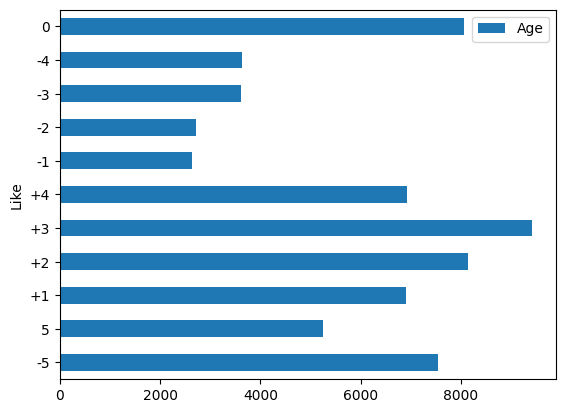

In [17]:
df.groupby(['Like']).sum().plot(kind='barh')

In [18]:
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [19]:
def convert_like_value(value):
    if isinstance(value, str):  # Check if the value is a string
        return int(value.lstrip('+'))  # Remove leading signs and convert to integer
    else:
        return value  # If it's already an integer, return it as-is

df['Like'] = df['Like'].apply(convert_like_value)

In [20]:
df1 = df.drop('Like',axis=1)

In [21]:
from sklearn.preprocessing import LabelEncoder
for col in df1.columns.to_list():
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])

In [22]:
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,43,0,0
1,1,1,0,1,1,1,1,1,1,0,0,33,0,0
2,0,1,1,1,1,1,0,1,1,1,0,44,0,0
3,1,1,0,1,1,1,1,1,0,0,1,51,4,0
4,0,1,0,1,1,1,1,0,0,1,0,31,3,1


In [23]:
df1['Like'] = df['Like']

In [24]:
df1['Like'].value_counts()

 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: Like, dtype: int64

In [25]:

from sklearn.decomposition import PCA


df1_scaled = (df1 - df1.mean()) / df1.std()  # Scale the data

# Perform PCA
pca = PCA(n_components=None)  # Keep all components by default
pca.fit(df1_scaled)

# Get components and variances
components = pca.components_
variances = pca.explained_variance_

# Calculate proportions and cumulative proportions of variance
total_variance = sum(variances)
proportions = variances / total_variance
cumulative_proportions = np.cumsum(proportions)

# Show summary information
print("Importance of components:")
print(pd.DataFrame({
    "PC": range(1, len(components) + 1),
    "Standard deviation": np.sqrt(variances),
    "Proportion of Variance": proportions,
    "Cumulative Proportion": cumulative_proportions
}))


Importance of components:
    PC  Standard deviation  Proportion of Variance  Cumulative Proportion
0    1            1.860129                0.230672               0.230672
1    2            1.335478                0.118900               0.349572
2    3            1.261657                0.106119               0.455691
3    4            1.052254                0.073816               0.529506
4    5            1.026995                0.070315               0.599821
5    6            0.990314                0.065382               0.665202
6    7            0.982756                0.064387               0.729590
7    8            0.907396                0.054891               0.784481
8    9            0.848495                0.047996               0.832477
9   10            0.777536                0.040304               0.872781
10  11            0.740010                0.036508               0.909289
11  12            0.722560                0.034806               0.944095
12  13      

In [26]:
x = df1.drop('Like',axis=1)
y = df1['Like']

In [27]:
from sklearn.cluster import KMeans  # K-means algorithm

In [28]:
kmeans = KMeans(n_clusters=3,n_init=10)  # Replace k with the desired number of clusters

In [29]:
kmeans.fit(x)  # X is your prepared data, usually a NumPy array or DataFrame

KMeans(n_clusters=3, n_init=10)

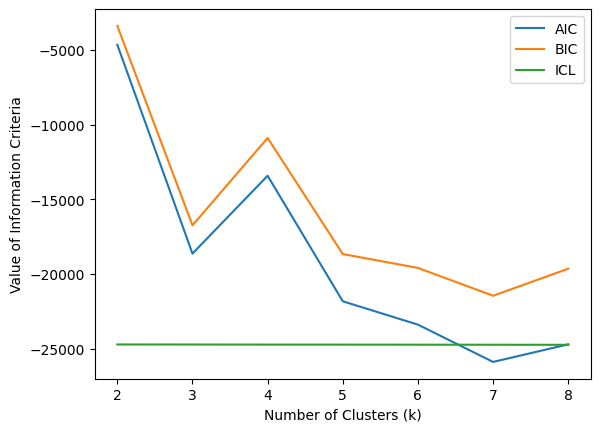

In [30]:
from sklearn.mixture import GaussianMixture
models = []
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, random_state=1234)  # Set random seed
    gmm.fit(x)
    models.append(gmm)
aic, bic, icl = [], [], []
for model in models:
    aic.append(model.aic(x))
    bic.append(model.bic(x))

k_values = range(2, 9)
plt.plot(k_values, aic, label="AIC")
plt.plot(k_values, bic, label="BIC")
icl = [0.0] * len(k_values)
for i in range(len(k_values)):
    icl[i] = gmm.aic(x) - 0.5 * np.log(x.shape[0]) * k_values[i]
plt.plot(k_values, icl, label="ICL")  # Replace with ICL values if available
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Value of Information Criteria")
plt.legend()
plt.show()


In [35]:
df1["Like.n"] = 6 - pd.to_numeric(df1["Like"])

predictor_cols = x.columns[:11]  # Extract first 11 column names
formula_str = "Like.n ~ " + "+".join(predictor_cols)

np.random.seed(1234)  # Set random seed
model = GaussianMixture(n_components=2, random_state=1234)  # Replace with a suitable mixture model
model.fit(x[predictor_cols])


GaussianMixture(n_components=2, random_state=1234)

In [36]:
cluster_labels = model.predict(df1[predictor_cols])
cluster_sizes = np.unique(cluster_labels, return_counts=True)[1]
print("Cluster sizes:", cluster_sizes)

Cluster sizes: [468 985]
